In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
import seaborn as sns

import frame_whitening as fw
import frame_whitening.plot as fwplt
import frame_whitening.simulation_new as sim

/mnt/home/lduong/miniconda3/envs/frame/lib/python3.9/site-packages/scipy/__init__.py:162: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(


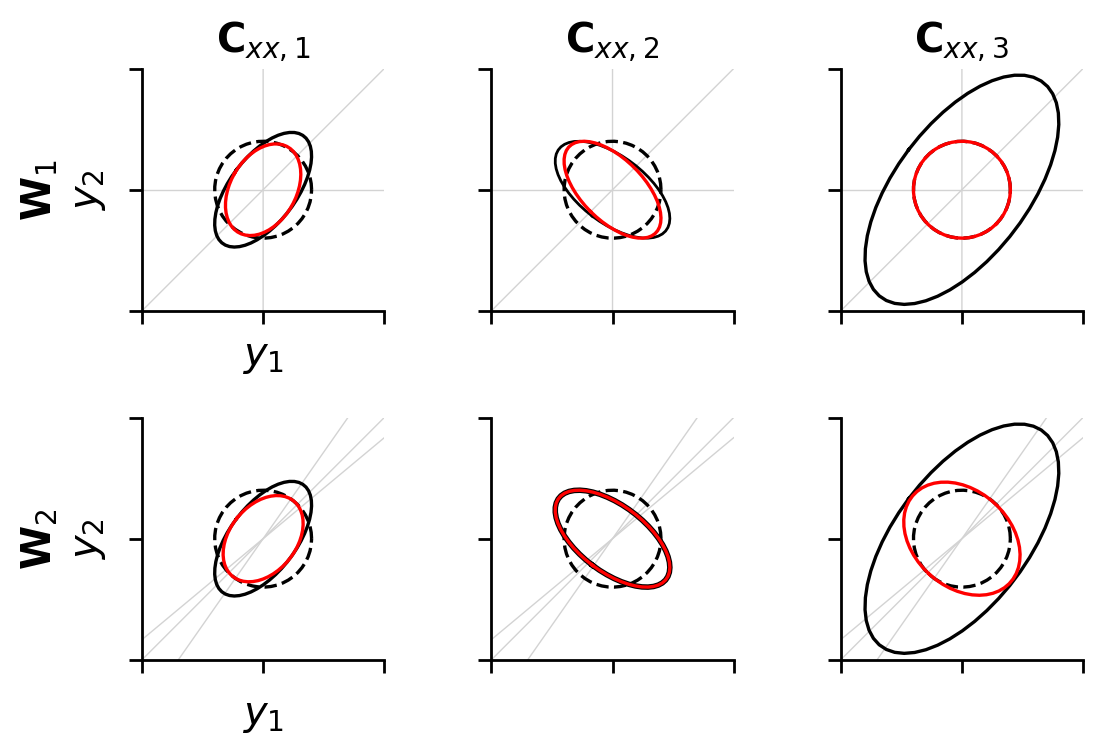

In [57]:
I = np.eye(2)

Q = fw.rot2(np.pi/2)
sigma_x = 1
sigma_y = 1.4
sigma_xy = 0.7
Cxx1 = np.array([[sigma_x, sigma_xy], [sigma_xy, sigma_y]])

Cxx  = [Cxx1, Q@Cxx1@Q.T, Cxx1*4]


W1 = fw.normalize_frame(np.array([[0+.00001, 1, 1],[1, 1, 0]]))

W2 = np.array([[1, .7, 1.2], [1, 1, 1]])
W2 = fw.normalize_frame(W2)

W = [W1, W2]

def get_m(W, g):
    return np.linalg.inv(I + W @ np.diag(g) @ W.T)

def whiten(Cxx, W, clamp):
    Lxx = np.linalg.cholesky(Cxx)
    g, _, _, _ = sim.simulate([Lxx], W, 0, 10000, 5E-3, None, online=False, clamp=clamp)
    g = g.squeeze()
    M = get_m(W, g)
    return M @ Cxx @ M.T

def plot_frame_axes2d(W, ax, colors=None, lim=5):
    if colors is None:
        colors = ["k"] * W.shape[1]
    else:
        assert len(colors) == W.shape[1]

    x = np.linspace(-lim, lim, 10)
    for i in range(W.shape[1]):
        ax.plot(x, (W[1, i] / W[0, i]) * x,  "-", lw=.5, color="lightgrey", zorder=-1)
   
with sns.plotting_context("paper", font_scale=1.5):
    fig, ax = plt.subplots(2, 3, sharey="all", sharex="all", dpi=200)
    fwplt.plot_ellipse(I, n_pts=50, ax=ax[0,0], color="k", linestyle="--")
    fwplt.plot_ellipse(Cxx[0], n_pts=50, ax=ax[0,0], color="k")
    fwplt.plot_ellipse(whiten(Cxx[0], W[0], True), n_pts=50, ax=ax[0,0], color="r")
    plot_frame_axes2d(W[0], ax[0,0])

    fwplt.plot_ellipse(I, n_pts=50, ax=ax[0,1], color="k", linestyle="--")
    fwplt.plot_ellipse(Cxx[1], n_pts=50, ax=ax[0,1], color="k", lw=1)
    fwplt.plot_ellipse(whiten(Cxx[1], W[0], True), n_pts=50, ax=ax[0,1], color="r")
    plot_frame_axes2d(W[0], ax[0,1])

    fwplt.plot_ellipse(I, n_pts=50, ax=ax[0,2], color="k", linestyle="--")
    fwplt.plot_ellipse(Cxx[2], n_pts=50, ax=ax[0,2], color="k")
    fwplt.plot_ellipse(whiten(Cxx[2], W[0], True), n_pts=50, ax=ax[0,2], color="r")
    plot_frame_axes2d(W[0], ax[0,2])

    fwplt.plot_ellipse(I, n_pts=50, ax=ax[1,0], color="k", linestyle="--")
    fwplt.plot_ellipse(Cxx[0], n_pts=50, ax=ax[1,0], color="k")
    fwplt.plot_ellipse(whiten(Cxx[0], W[1], True), n_pts=50, ax=ax[1,0], color="r")
    plot_frame_axes2d(W[1], ax[1,0])

    fwplt.plot_ellipse(I, n_pts=50, ax=ax[1,1], color="k", linestyle="--")
    fwplt.plot_ellipse(Cxx[1], n_pts=50, ax=ax[1,1], color="k", lw=2)
    fwplt.plot_ellipse(whiten(Cxx[1], W[1], True), n_pts=50, ax=ax[1,1], color="r")
    plot_frame_axes2d(W[1], ax[1,1])

    fwplt.plot_ellipse(I, n_pts=50, ax=ax[1,2], color="k", linestyle="--")
    fwplt.plot_ellipse(Cxx[2], n_pts=50, ax=ax[1,2], color="k")
    fwplt.plot_ellipse(whiten(Cxx[2], W[1], True), n_pts=50, ax=ax[1,2], color="r")
    plot_frame_axes2d(W[1], ax[1,2])

    ax[0,0].axis("square")
    ax[0,1].axis("square")
    ax[1,0].axis("square")
    ax[1,1].axis("square")
    ax[0,2].axis("square")
    ax[1,2].axis("square")

    ax[0,0].set(xlim=(-5, 5), ylim=(-5, 5), yticks=(-5, 0, 5), xticks=(-5, 0, 5),
    xticklabels=[], yticklabels=[], ylabel=r"${\bf W}_1$" "\n" r"$y_2$", 
    title=r"${\bf C}_{xx,1}$", xlabel=r"$y_1$")
    ax[1,0].set(ylabel=r"${\bf W}_2$" "\n" r"$y_2$", xlabel=r"$y_1$")
    ax[0,1].set(title=r"${\bf C}_{xx,2}$")
    ax[0,2].set(title=r"${\bf C}_{xx,3}$")
    fig.tight_layout()
    sns.despine()